<a href="https://colab.research.google.com/github/Joacco11/AluraStore/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)
tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [11]:
def facturacion_total():
    data = {
        'Tienda': ['Tienda_1', 'Tienda_2', 'Tienda_3', 'Tienda_4'],
        'Facturación': [
            round(tienda['Precio'].sum(),2),
            round(tienda2['Precio'].sum(),2),
            round(tienda3['Precio'].sum(),2),
            round(tienda4['Precio'].sum(),2)
        ]
    }
    return pd.DataFrame(data)

facturacion_total()

,Tienda,Facturación
0,Tienda_1,1.150880e+09
1,Tienda_2,1.116344e+09
2,Tienda_3,1.098020e+09
3,Tienda_4,1.038376e+09


# 2. Ventas por categoría

In [12]:
def ventas_por_categoria_y_tienda():
    # Añadir columna de tienda a cada DataFrame
    df1 = tienda.assign(Tienda='Tienda 1')
    df2 = tienda2.assign(Tienda='Tienda 2')
    df3 = tienda3.assign(Tienda='Tienda 3')
    df4 = tienda4.assign(Tienda='Tienda 4')

    # Concatenar
    tiendas_combinadas = pd.concat([df1, df2, df3, df4], ignore_index=True)

    # Agrupar por categoría y tienda
    ventas = tiendas_combinadas.groupby(['Categoría del Producto', 'Tienda'])['Precio'].sum().reset_index()
    return ventas
ventas_por_categoria_y_tienda()

,Categoría del Producto,Tienda,Precio
0,Artículos para el hogar,Tienda 1,12698400.0
1,Artículos para el hogar,Tienda 2,14746900.0
2,Artículos para el hogar,Tienda 3,15060000.0
3,Artículos para el hogar,Tienda 4,15074500.0
4,Deportes y diversión,Tienda 1,39290000.0
5,Deportes y diversión,Tienda 2,34744500.0
6,Deportes y diversión,Tienda 3,35593100.0
7,Deportes y diversión,Tienda 4,33350100.0
8,Electrodomésticos,Tienda 1,363685200.0
9,Electrodomésticos,Tienda 2,348567800.0


# 3. Calificación promedio de la tienda


In [13]:
def calificacion_promedio():
  # Calcular calificación promedio por tienda
  calif_tienda1 = tienda['Calificación'].mean()
  calif_tienda2 = tienda2['Calificación'].mean()
  calif_tienda3 = tienda3['Calificación'].mean()
  calif_tienda4 = tienda4['Calificación'].mean()

  # Crear DataFrame con resultados
  calificaciones = pd.DataFrame({
      'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
      'Calificación Promedio': [calif_tienda1, calif_tienda2, calif_tienda3, calif_tienda4]
  })
  return pd.DataFrame(calificaciones)
calificacion_promedio()

,Tienda,Calificación Promedio
0,Tienda 1,3.976685
1,Tienda 2,4.037304
2,Tienda 3,4.048326
3,Tienda 4,3.995759


# 4. Productos más y menos vendidos

In [14]:

def ventas_top_y_bottom_unidades():
    df1 = tienda.assign(Tienda='Tienda 1')
    df2 = tienda2.assign(Tienda='Tienda 2')
    df3 = tienda3.assign(Tienda='Tienda 3')
    df4 = tienda4.assign(Tienda='Tienda 4')

    # Concatenar
    combinado = pd.concat([df1, df2, df3, df4], ignore_index=True)

    # Contar unidades vendidas por producto y tienda
    ventas = combinado.groupby(['Producto', 'Tienda']).size().reset_index(name='Unidades Vendidas')

    # Top 5 por tienda
    top_df = (ventas.sort_values(['Tienda', 'Unidades Vendidas'], ascending=[True, False])
                     .groupby('Tienda')
                     .head(5)
                     .reset_index(drop=True))

    # Bottom 5 por tienda
    bottom_df = (ventas.sort_values(['Tienda', 'Unidades Vendidas'], ascending=[True, True])
                        .groupby('Tienda')
                        .head(5)
                        .reset_index(drop=True))

    return top_df, bottom_df
top_df, bottom_df = ventas_top_y_bottom_unidades()
bottom_df

,Producto,Tienda,Unidades Vendidas
0,Auriculares con micrófono,Tienda 1,33
1,Celular ABXY,Tienda 1,33
2,Olla de presión,Tienda 1,35
3,Pandereta,Tienda 1,36
4,Ciencia de datos con Python,Tienda 1,39
5,Juego de mesa,Tienda 2,32
6,Impresora,Tienda 2,34
7,Mesa de comedor,Tienda 2,34
8,Sillón,Tienda 2,35
9,Auriculares,Tienda 2,37


# 5. Envío promedio por tienda

In [15]:
def promedio_costo_envio():
    data = {
        'Tienda': ['Tienda_1', 'Tienda_2', 'Tienda_3', 'Tienda_4'],
        'Promedio Costo de Envío': [
            round(tienda['Costo de envío'].mean(), 2),
            round(tienda2['Costo de envío'].mean(), 2),
            round(tienda3['Costo de envío'].mean(), 2),
            round(tienda4['Costo de envío'].mean(), 2)
        ]
    }
    return pd.DataFrame(data)

promedio_costo_envio()

,Tienda,Promedio Costo de Envío
0,Tienda_1,26018.61
1,Tienda_2,25216.24
2,Tienda_3,24805.68
3,Tienda_4,23459.46


#6. Diagramas de Análisis



*   Relación entre ganancia y costo de envío





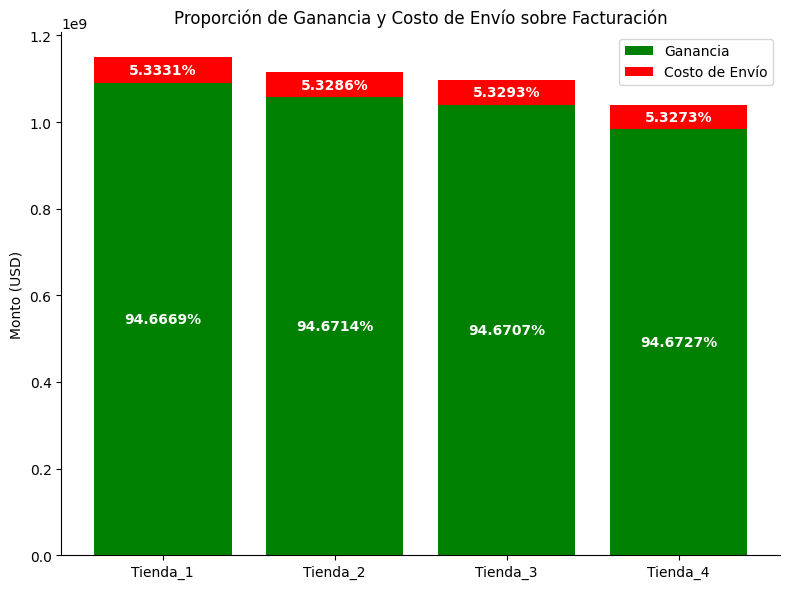

In [20]:
def CostoEnvio_total():
    data = {
        'Tienda': ['Tienda_1', 'Tienda_2', 'Tienda_3', 'Tienda_4'],
        'Costo de envío': [
            round(tienda['Costo de envío'].sum(),2),
            round(tienda2['Costo de envío'].sum(),2),
            round(tienda3['Costo de envío'].sum(),2),
            round(tienda4['Costo de envío'].sum(),2)
        ]
    }
    return pd.DataFrame(data)
df_costo = CostoEnvio_total()
df_fact = facturacion_total()
df_mean_envio = promedio_costo_envio()

df_merge = pd.merge(df_fact, df_mean_envio, on="Tienda")
df_merge_final = pd.merge(df_merge, df_costo, on="Tienda")
df_merge_final['Ganancia'] = df_merge_final['Facturación']-df_merge_final['Costo de envío']
df_merge_final

#Datos
def impresion_CostoEnvio_total():
      df = df_merge_final

      # Gráfico de barras apiladas
      fig, ax = plt.subplots(figsize=(8, 6))

      # Ganancia
      ax.bar(df['Tienda'], df['Ganancia'], label='Ganancia', color='green')

      # Costo de envío (apilado encima de ganancia)
      ax.bar(df['Tienda'], df['Costo de envío'], bottom=df['Ganancia'], label='Costo de Envío', color='red')

      # Etiquetas con porcentaje
      for i, (fact, gan, cost) in enumerate(zip(df['Facturación'], df['Ganancia'], df['Costo de envío'])):
          # Porcentaje Ganancia
          ax.text(i, gan/2, f"{gan/fact:.4%}", ha='center', va='center', color='white', fontsize=10, fontweight='bold')
          # Porcentaje Costo de envío
          ax.text(i, gan + cost/2, f"{cost/fact:.4%}", ha='center', va='center', color='white', fontsize=10, fontweight='bold')

      # Estética
      ax.set_ylabel('Monto (USD)')
      ax.set_title('Proporción de Ganancia y Costo de Envío sobre Facturación')
      ax.legend()
      ax.spines['top'].set_visible(False)
      ax.spines['right'].set_visible(False)

      plt.tight_layout()
      plt.show()
impresion_CostoEnvio_total()



*   Promedio de calificación



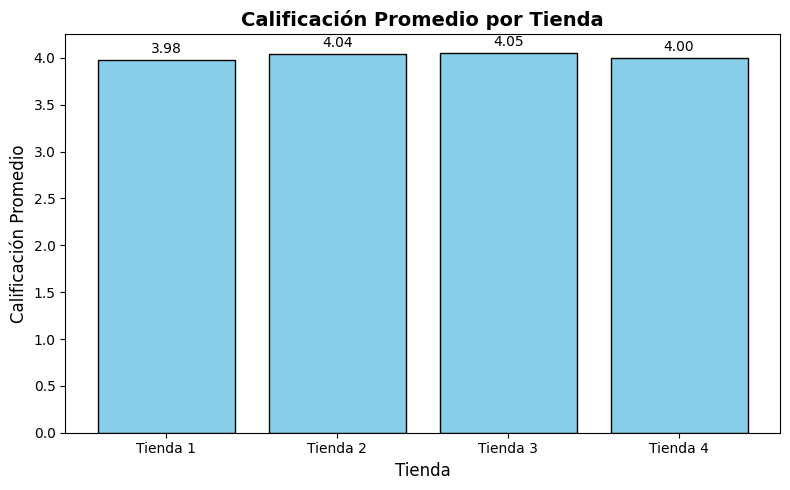

In [22]:
def impresion_promedio_tienda():
  df = calificacion_promedio()

  #Gráfico
  plt.figure(figsize=(8, 5))
  plt.bar(df['Tienda'], df['Calificación Promedio'], color='skyblue', edgecolor='black')

  # Etiquetas y título
  plt.xlabel("Tienda", fontsize=12)
  plt.ylabel("Calificación Promedio", fontsize=12)
  plt.title("Calificación Promedio por Tienda", fontsize=14, fontweight='bold')

  # Etiquetas sobre las barras
  for i, v in enumerate(df['Calificación Promedio']):
      plt.text(i, v + (v * 0.02), f"{v:.2f}", ha='center', fontsize=10)


  plt.tight_layout()
  plt.show()
impresion_promedio_tienda()



*   Línea de Tiempo



/tmp/ipython-input-3961005723.py:12: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  tiendas_combinadas['Fecha de Compra'] = pd.to_datetime(tiendas_combinadas['Fecha de Compra'])


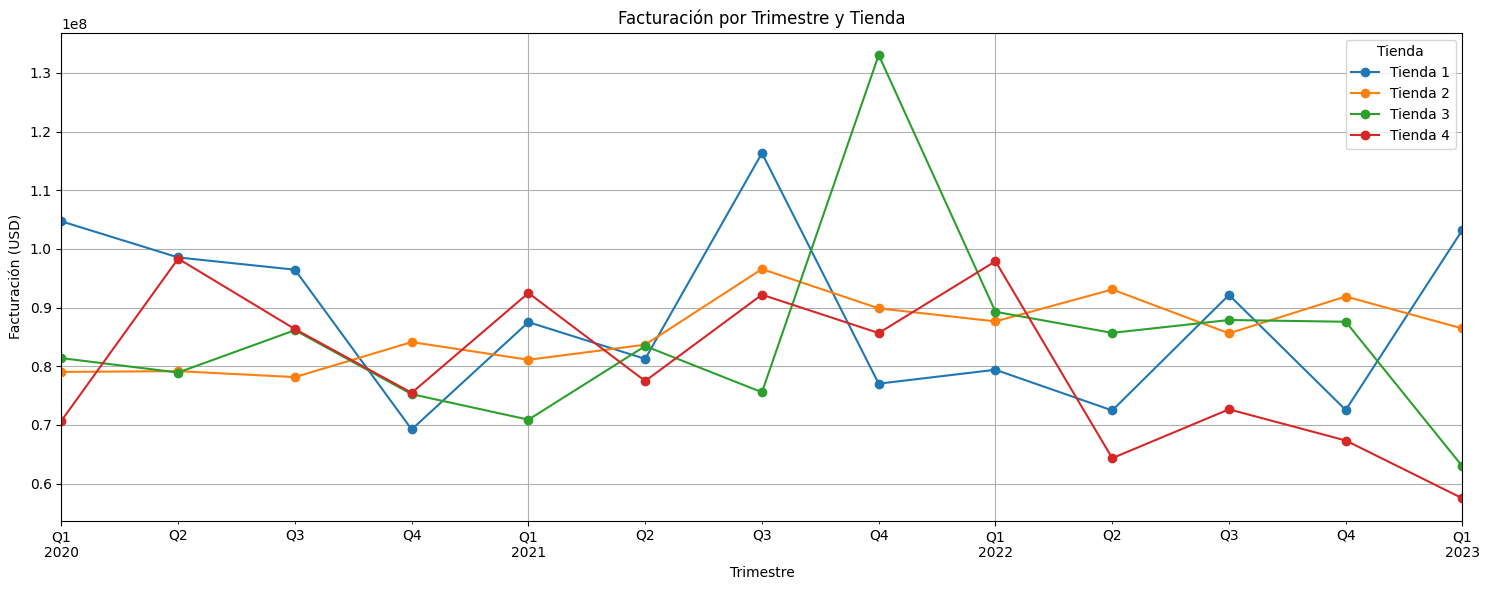

In [24]:
def impresion_linea_tiempo():
  # Crear copias con columna 'Tienda'
  df1 = tienda.assign(Tienda='Tienda 1')
  df2 = tienda2.assign(Tienda='Tienda 2')
  df3 = tienda3.assign(Tienda='Tienda 3')
  df4 = tienda4.assign(Tienda='Tienda 4')

  # Concatenar
  tiendas_combinadas = pd.concat([df1, df2, df3, df4], ignore_index=True)

  # Convertir la columna 'Fecha de Compra' a datetime
  tiendas_combinadas['Fecha de Compra'] = pd.to_datetime(tiendas_combinadas['Fecha de Compra'])

  # Identificar el trimestre y año
  tiendas_combinadas['Trimestre'] = tiendas_combinadas['Fecha de Compra'].dt.to_period('Q')

  # Agrupar por tienda y trimestre sumando la facturación
  facturacion_trimestral = (
      tiendas_combinadas.groupby(['Trimestre', 'Tienda'])['Precio']
      .sum()
      .reset_index()
  )

  # Pivotar para que cada tienda sea una columna
  facturacion_pivot = facturacion_trimestral.pivot(index='Trimestre', columns='Tienda', values='Precio')

  # Grafica
  facturacion_pivot.plot(marker='o', figsize=(15, 6))
  plt.title('Facturación por Trimestre y Tienda')
  plt.ylabel('Facturación (USD)')
  plt.xlabel('Trimestre')
  plt.legend(title='Tienda')
  plt.grid(True)
  plt.tight_layout()
  plt.show()
impresion_linea_tiempo()

#Informe de Recomendación para el Sr. Juan


1.   Ingresos totales y proporción de ganancias:

Del análisis de facturación, todas las tiendas presentan un margen de ganancia sobre facturación muy similar, en torno al 94.7%. Sin embargo, la Tienda 4 es la que factura menos en términos absolutos. El gráfico de barras apiladas muestra que, aunque el peso relativo del costo de envío respecto a la facturación es comparable, el volumen total de ventas de la Tienda 4 es inferior, lo que podría indicar menor capacidad de escala.
      

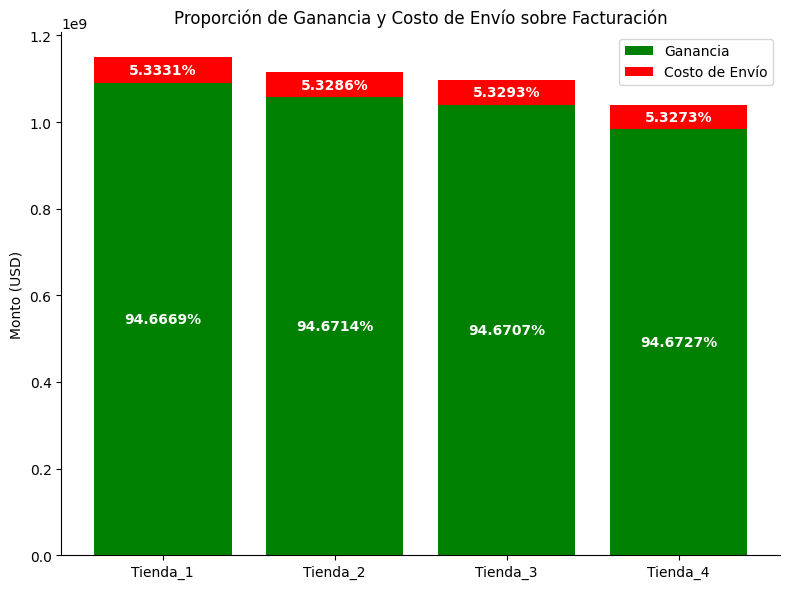

In [21]:
impresion_CostoEnvio_total()

2.   Calificación promedio de clientes

El gráfico de barras con las calificaciones promedio indica que la Tienda 1 tiene la puntuación más baja, aunque la diferencia con las demás es mínima (solo 0.02 puntos). Esto sugiere que la experiencia del cliente es relativamente homogénea entre todas las tiendas.

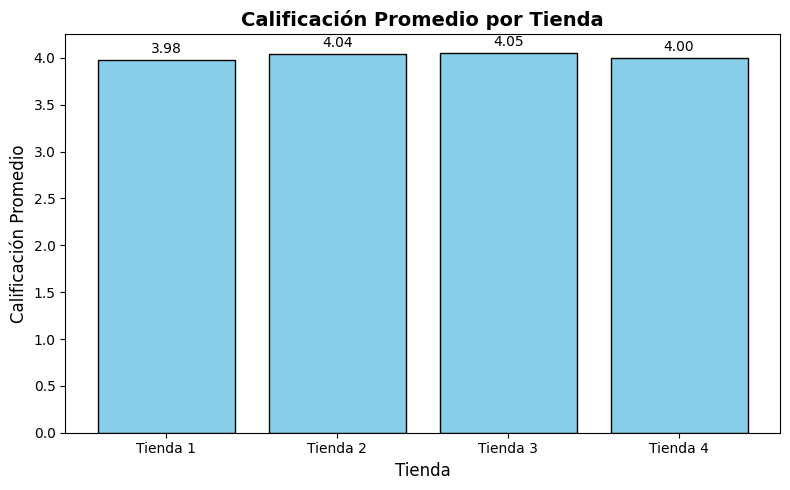

In [23]:
impresion_promedio_tienda()

3. Tendencia de ventas en el tiempo

El gráfico de líneas de tiempo revela que la Tienda 4 ha mostrado un desempeño decreciente en el último trimestre, quedando por debajo de las demás tiendas. Esta tendencia descendente es un factor de riesgo, ya que podría indicar pérdida de clientes, reducción de demanda o problemas operativos.

/tmp/ipython-input-3961005723.py:12: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  tiendas_combinadas['Fecha de Compra'] = pd.to_datetime(tiendas_combinadas['Fecha de Compra'])


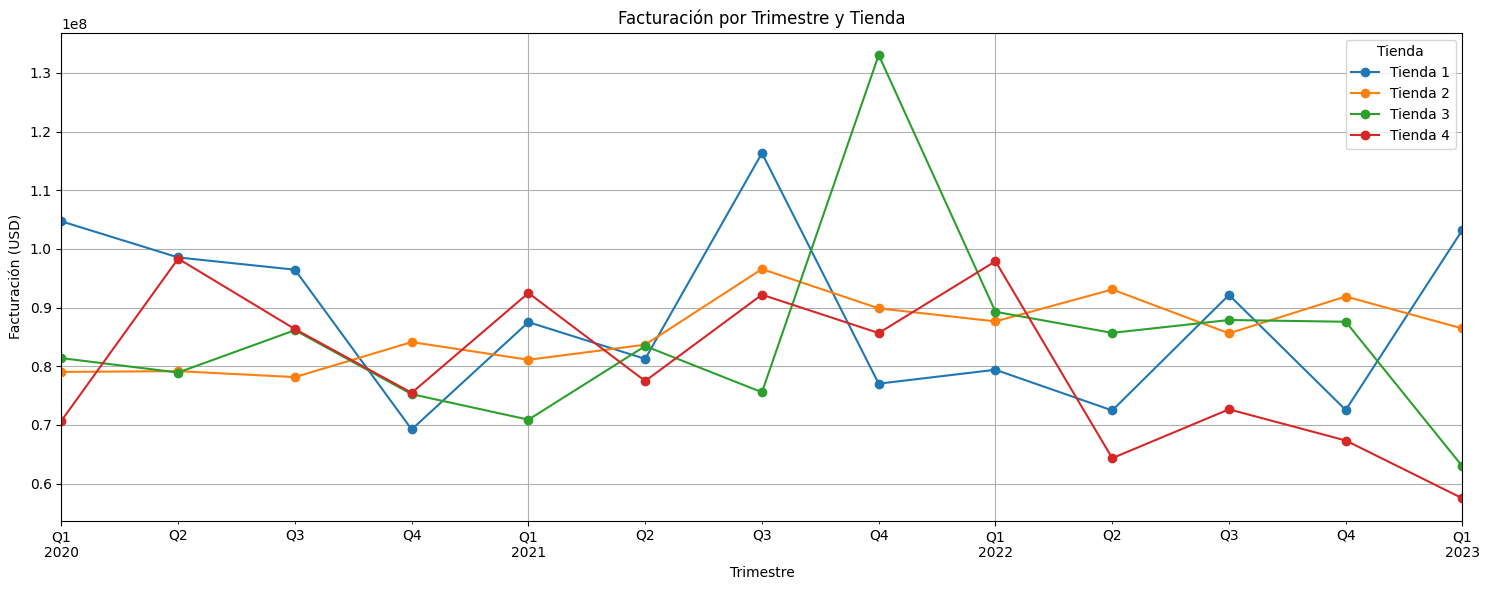

In [25]:
impresion_linea_tiempo()

#Conclusión y recomendación
Con base en los datos analizados, la Tienda 4 es la candidata más evidente para ser vendida. A pesar de que su proporción de ganancia respecto al costo de envío es similar a las demás (alrededor del 94,7 %), presenta desventajas claras:

Es la tienda con menor volumen de facturación total.

Su tendencia de ventas en el último trimestre es negativa, mostrando una caída sostenida frente a las demás.

No presenta ventajas diferenciadoras en calificación promedio de clientes o en costos de envío que compensen su bajo rendimiento.

En contraste, las Tiendas 1, 2 y 3 mantienen ingresos estables y sin tendencias a la baja, por lo que desprenderse de ellas supondría perder unidades de negocio más sólidas.

#Recomendación final
El Sr. Juan debería vender la Tienda 4, ya que es la menos eficiente en términos de facturación y presenta una tendencia de rendimiento decreciente. Liberar este activo permitiría obtener capital para su nuevo emprendimiento sin comprometer las unidades más rentables y estables de la cadena.